In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data=pd.read_csv(r'Social_Network_Ads.csv')
df=pd.DataFrame(data)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [54]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [55]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: >

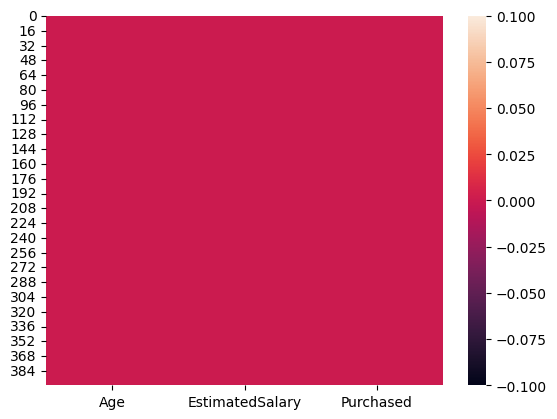

In [56]:
sns.heatmap(df.isnull())

<Axes: >

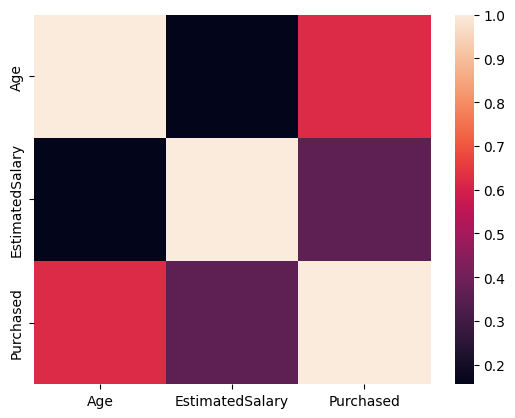

In [57]:
sns.heatmap(df.corr())

In [58]:
df[df['Purchased']==1]

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [59]:
print("No of user classified by 1 are ::",len(df[df['Purchased']==1]))
print("No of user classified by 0 are ::",len(df[df['Purchased']==0]))

No of user classified by 1 are :: 143
No of user classified by 0 are :: 257


In [60]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Purchased', ylabel='count'>

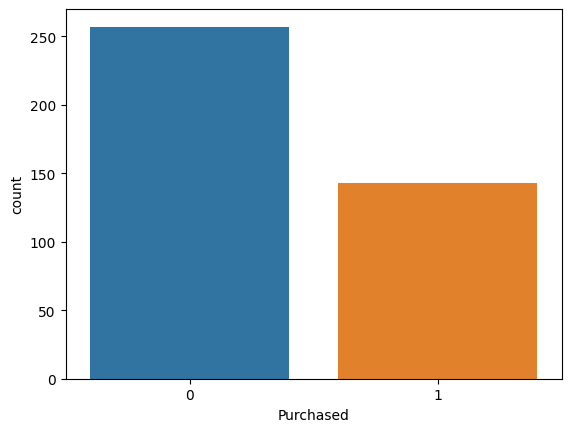

In [61]:
sns.countplot(data=df, x='Purchased')

In [62]:
x=df.drop(columns='Purchased')
y=df['Purchased']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (320, 2)
X Test Shape (80, 2)
Y Train Shape (320,)
Y Test Shape (80,)


In [65]:
from sklearn.svm import SVC
svc=SVC()

In [66]:
svc.fit(x_train,y_train)

SVC()

In [67]:
y_predict=svc.predict(x_test)

In [68]:
print(len(y_predict!=y_test))

80


In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [70]:
report=classification_report(y_test,y_predict)
cmatrix=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)

In [71]:
print("+++++++++++++++++++++++++++++++++++++++++++++++++ CLASSIFICATION REPORT +++++++++++++++++++++++++++++++++++++++++++++++++")
print(report)

+++++++++++++++++++++++++++++++++++++++++++++++++ CLASSIFICATION REPORT +++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



+++++++++++++++++++++++++++++++++++++++++++++++++ CONFUSION MATRIX REPORT +++++++++++++++++++++++++++++++++++++++++++++++++
[[56  2]
 [12 10]]


<Axes: >

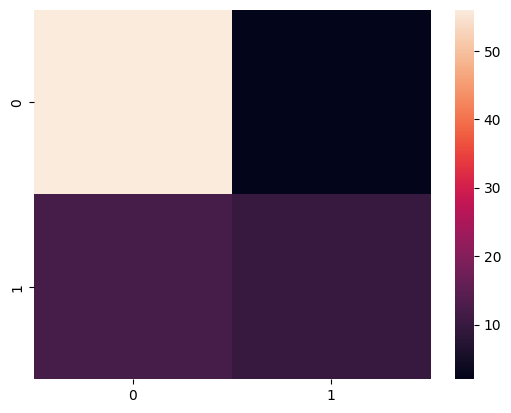

In [72]:
print("+++++++++++++++++++++++++++++++++++++++++++++++++ CONFUSION MATRIX REPORT +++++++++++++++++++++++++++++++++++++++++++++++++")
print(cmatrix)
sns.heatmap(cmatrix)

In [73]:
print(accuracy*100)

82.5


In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
x=sc.fit_transform(x)
print(x)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
from sklearn.svm import SVC
svc1=SVC()

In [78]:
svc1.fit(x_train,y_train)

SVC()

In [79]:
y_pred=svc1.predict(x_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [82]:
report1=classification_report(y_test,y_predict)
cmatrix1=confusion_matrix(y_test,y_predict)
accuracy1=accuracy_score(y_test,y_predict)

In [83]:
print("+++++++++++++++++++++++++++++++++++++++++++++++++ CLASSIFICATION REPORT +++++++++++++++++++++++++++++++++++++++++++++++++")
print(report1)

+++++++++++++++++++++++++++++++++++++++++++++++++ CLASSIFICATION REPORT +++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



+++++++++++++++++++++++++++++++++++++++++++++++++ CONFUSION MATRIX REPORT +++++++++++++++++++++++++++++++++++++++++++++++++
[[56  2]
 [12 10]]


<Axes: >

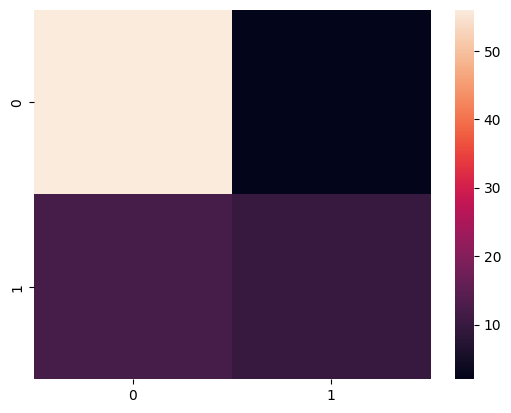

In [85]:
print("+++++++++++++++++++++++++++++++++++++++++++++++++ CONFUSION MATRIX REPORT +++++++++++++++++++++++++++++++++++++++++++++++++")
print(cmatrix1)
sns.heatmap(cmatrix1)

In [86]:
print(accuracy1*100)

82.5
